In [2]:
#Requiered libraries
import pandas as pd
import os
import numpy as np
from datetime import date
from keras.utils import image_dataset_from_directory
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Resizing
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomBrightness
from tensorflow.keras.layers import RandomContrast 
from tensorflow.keras.layers import RandomTranslation

# For evaluating performance
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [121]:
#Reading the dataset


DATE= date.today().strftime("%Y_%m_%d")
DATASET_PATH_train = r"C:\Users\Alex\Documents\GitHub\may25_bds_plants\05_data\original_data\New Plant Diseases Dataset\New Plant Diseases Dataset\train"

DATASET_PATH_valid = r"C:\Users\Alex\Documents\GitHub\may25_bds_plants\05_data\original_data\New Plant Diseases Dataset\New Plant Diseases Dataset\valid"


In [122]:
#Constant variables

IMAGE_SIZE = (256, 256, 3)  # (height, width, channels)
vector_size_1D = IMAGE_SIZE[0] * IMAGE_SIZE[1] * IMAGE_SIZE[2]  # Flattened size for each image
batch_size = 32



In [146]:
train = image_dataset_from_directory(
    DATASET_PATH_train,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    #label_mode='categorical',  # Use categorical labels
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    seed=42,  # Random seed for reproducibility
    )


classes_healthy = [class_name for class_name in train.class_names if "healthy" in class_name.lower()]
classes_sick = [class_name for class_name in train.class_names if "healthy" not in class_name.lower()]

train_healthy = image_dataset_from_directory(
    DATASET_PATH_train,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    class_names= classes_healthy,  # Filter classes to include only healthy ones
    #validation_split=0.2,  # Split the dataset into training and validation sets
    #subset='training',  # Use the training subset
    #seed=42,  # Random seed for reproducibility
    )
"""
train_val_healthy = image_dataset_from_directory(
    DATASET_PATH_train,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    class_names= classes_healthy,  # Filter classes to include only healthy ones
    #validation_split=0.2,  # Split the dataset into training and validation sets
    #subset="validation"  ,  # Use the training subset
    #seed=42,  # Random seed for reproducibility
    )
"""
train_sick = image_dataset_from_directory(
    DATASET_PATH_train,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    class_names= classes_sick,  # Filter classes to include only healthy ones
    #validation_split=0.2,  # Split the dataset into training and validation sets
    #subset='training',  # Use the training subset
    #seed=42,  # Random seed for reproducibility
    )

"""train_val_sick = image_dataset_from_directory(
    DATASET_PATH_train,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    class_names= classes_sick,  # Filter classes to include only healthy ones
    #validation_split=0.2,  # Split the dataset into training and validation sets
    #subset="validation"  ,  # Use the training subset
    #seed=42,  # Random seed for reproducibility
    )
"""
valid = image_dataset_from_directory(
    DATASET_PATH_valid,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    #label_mode='categorical',  # Use categorical labels
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    seed=42,  # Random seed for reproducibility
    )

test_healthy = image_dataset_from_directory(
    DATASET_PATH_valid,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    class_names= classes_healthy,  # Filter classes to include only healthy ones
    )

test_sick = image_dataset_from_directory(
    DATASET_PATH_valid,  # Path to the dataset
    labels='inferred',  # Automatically infer labels from subdirectory names
    image_size=IMAGE_SIZE[:2],  # Resize images to the specified size
    batch_size=batch_size,  # Number of images per batch
    class_names= classes_sick,  # Filter classes to include only healthy ones
    )


Found 70295 files belonging to 38 classes.
Found 22294 files belonging to 12 classes.
Found 48001 files belonging to 26 classes.
Found 17572 files belonging to 38 classes.
Found 5572 files belonging to 12 classes.
Found 12000 files belonging to 26 classes.


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'T

In [ ]:

"""
# Configuration for performance optimization
# This is used to optimize the performance of data loading and preprocessing
AUTOTUNE = tf.data.AUTOTUNE
# Apply performance optimizations to the datasets
train_healthy = train_healthy.cache().prefetch(buffer_size=AUTOTUNE)
test_healthy = train_healthy.cache().prefetch(buffer_size=AUTOTUNE)
train_val_healthy = train_sick.cache().prefetch(buffer_size=AUTOTUNE)
"""

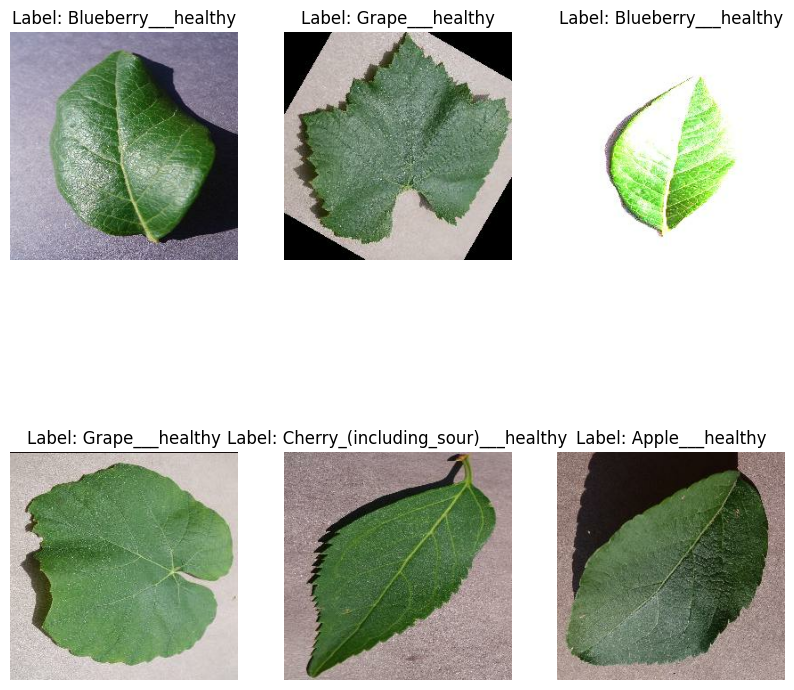

In [ ]:
# Define the number of images to display
number_of_images = 6

# Create a figure for displaying
plt.figure(figsize=(10,10))

# Get a batch of images from train_healthy
for images, labels in train_healthy.take(1):
    # Display the images from the batch
    for i in range(number_of_images):
        ax = plt.subplot(2, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert the image to integer for display
        plt.axis("off") 
        plt.title(f"Label: {train_healthy.class_names[labels[i]]}")  # Display the label of the image
        # labels[i] gives back the number of the folder, e.g 0 stands for apple(1.Folder), 3 for corn(4.Folder), etc.
# Show the images
plt.show()

In [165]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               restore_best_weights=True)

ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', 
                                      factor=0.2, 
                                      patience=2,
                                      cooldown=2,
                                      min_delta=0.01,
                                      verbose=1) 

# For evaluating performance
checkpoint = ModelCheckpoint(
    filepath=rf"C:\Users\Alex\Documents\GitHub\may25_bds_plants\05_data\Model\model_{DATE}.keras",  # Save the model with a timestamp
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Save when validation loss is minimized
    #verbose=1  # Verbose output
    )   




In [164]:
#First Model
# Define the input layer with the specified image size
inputs = Input(shape = IMAGE_SIZE)
x = Rescaling(1./255)(inputs)  # Normalize pixel values to [0, 1]
x = Conv2D(filters = 32, 
           kernel_size=(5, 5), 
           activation='relu')(x)  # Apply a convolutional layer
x = MaxPooling2D(pool_size=(2, 2))(x)  # Apply max pooling to reduce dimensionality
x = Dropout(0.2)(x)  # Apply dropout for regularization
x = Flatten()(x)  # Flatten the image to a 1D vector
x = Dense(128, activation='relu')(x)  # Fully connected layer with 128 units
outputs = Dense(len(train_healthy.class_names), activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model on the training dataset
train_healthy_history = model.fit(train_healthy,
                    validation_data=test_healthy,
                    epochs=10,
                    callbacks=[early_stopping, ReduceLROnPlateau, checkpoint]
                    )



Epoch 1/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 862s 1s/step - accuracy: 0.5733 - loss: 4.3373 - val_accuracy: 0.8568 - val_loss: 0.4335 - learning_rate: 0.0010
Epoch 2/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9100 - loss: 0.2782

697/697 ━━━━━━━━━━━━━━━━━━━━ 860s 1s/step - accuracy: 0.9100 - loss: 0.2781 - val_accuracy: 0.8977 - val_loss: 0.3328 - learning_rate: 0.0010
Epoch 3/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 968s 1s/step - accuracy: 0.9642 - loss: 0.1053 - val_accuracy: 0.8819 - val_loss: 0.4182 - learning_rate: 0.0010
Epoch 4/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9443 - loss: 0.1905
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
697/697 ━━━━━━━━━━━━━━━━━━━━ 846s 1s/step - accuracy: 0.9442 - loss: 0.1906 - val_accuracy: 0.8304 - val_loss: 0.7214 - learning_rate: 0.0010
Epoch 5/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 838s 1s/step - accuracy: 0.9854 - loss: 0.0571 - val_accuracy: 0.8968 - val_loss: 0.4281 - learning_rate: 2.0000e-04


In [166]:
train_acc = train_healthy_history.history['accuracy']
val_acc = train_healthy_history.history['val_accuracy']
train_healthy_history.history["loss"]

[1.401691198348999,
 0.22005027532577515,
 0.09174378961324692,
 0.2083972990512848,
 0.03228725492954254]

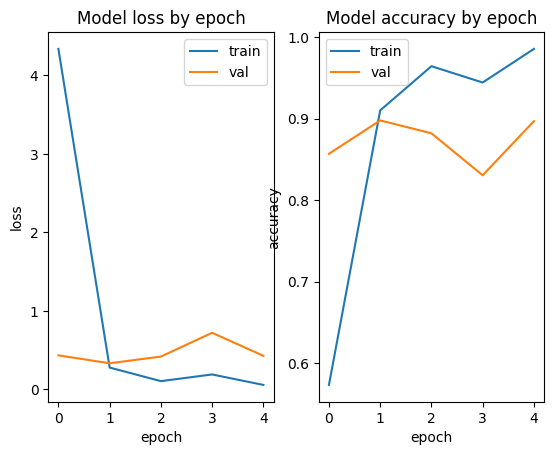

In [5]:
plt.subplot(121)
plt.plot((4.3373, 0.2782, 0.1053, 0.1905, 0.0571 ))
plt.plot((0.4335, 0.3328, 0.4182, 0.7214 ,0.4281) )
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

plt.subplot(122)
plt.plot((0.5733, 0.9100, 0.9642, 0.9442, 0.9854 ))
plt.plot((0.8568, 0.8977, 0.8819, 0.8304, 0.8968 ))
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.show()

NameError: name 'train_healthy_history' is not defined

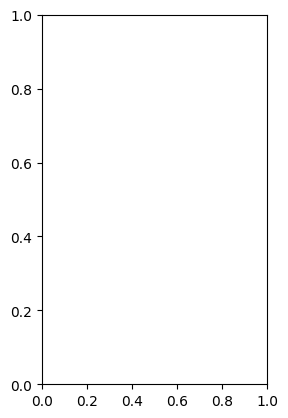

In [ ]:
#plt.figure(fig_size=(10,8))
plt.subplot(121)
plt.plot(train_healthy_history.history['loss'])
plt.plot(train_healthy_history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

plt.subplot(122)
plt.plot(train_healthy_history.history['accuracy'])
plt.plot(train_healthy_history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.show()

In [168]:
def get_predictions_and_labels(dataset):
    true_labels = []
    pred_labels = []

    for images, labels in dataset:
        
        preds = model.predict(images, verbose=0)  # Get the model's predictions
        pred_labels.extend(np.argmax(preds, axis=-1))  # Get the predicted labels (argmax)

        true_labels.extend(labels.numpy())  # Get the true labels

    return np.array(true_labels), np.array(pred_labels)

y_true, y_pred = get_predictions_and_labels(test_healthy)  # Get true labels and predictions from the test dataset

# Display the classification report
print(classification_report(y_true, y_pred))  # Print the classification report (precision, recall, F1-score)

# Display the confusion matrix
#plt.figure(figsize=(15, 15))  # Create a large figure for the confusion matrix
#cnf_matrix = confusion_matrix(y_true, y_pred, normalize='true')  # Compute the normalized confusion matrix
#sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False, fmt=".2f")  # Plot the confusion matrix as a heatmap

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       502
           1       0.84      0.93      0.88       454
           2       0.92      0.87      0.89       456
           3       1.00      1.00      1.00       465
           4       0.95      0.90      0.92       423
           5       0.95      0.94      0.95       432
           6       0.80      0.82      0.81       497
           7       0.82      0.85      0.83       456
           8       0.79      0.95      0.86       445
           9       0.92      0.84      0.87       505
          10       0.96      0.94      0.95       456
          11       0.97      0.94      0.96       481

    accuracy                           0.90      5572
   macro avg       0.90      0.90      0.90      5572
weighted avg       0.90      0.90      0.90      5572



In [ ]:
model_loaded = load_model()